# Summary of Notebook
    query to focus on target shopper
    it looks like the biggest difference with the target shoppers is that there is a higher count of married in the dataset which means that the sum of sales is greater for this group. The max, min and average isn't very different from not target shoppers.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

In [2]:
#import pickle active customers dataframe
df_active = pd.read_pickle(r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis\04 Analysis\all_active_with_value.pkl')
path = r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis'
df_active = pd.read_pickle(os.path.join(path, '04 Analysis', 'all_active_with_value.pkl'))

In [3]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28669841 entries, 0 to 30330083
Data columns (total 32 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int16         
 3   day_of_week_ordered     int16         
 4   hour_of_day_ordered     int16         
 5   days_since_prior_order  float64       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   product_name            category      
 10  aisle_id                int16         
 11  department_id           int16         
 12  price                   float64       
 13  gender                  category      
 14  state                   category      
 15  age                     int16         
 16  date_joined             datetime64[ns]
 17  dependents              int16         
 18  

In [4]:
#trying to learn about target customers
df_filtered = df_active.query("value_flag == 'target shopper'")

In [5]:
#try to see which department generates the most money
df_filtered.groupby(['department_id','product_name'])['price'].agg('sum').sort_values(ascending=False).head(15)

department_id  product_name            
4              Banana                      3624699.3
               Bag of Organic Bananas      2495566.4
               Large Lemon                 1335040.0
               Limes                       1289263.5
               Organic Baby Spinach        1240241.8
               Organic Strawberries        1221151.3
16             Organic Whole Milk          1132531.2
4              Cucumber Kirby               794283.6
               Apple Honeycrisp Organic     758622.3
               Organic Cucumber             726668.8
               Organic Avocado              675958.5
               Asparagus                    591076.2
               Organic Baby Carrots         572901.8
               Michigan Organic Kale        561553.8
               Organic Hass Avocado         547180.0
Name: price, dtype: float64

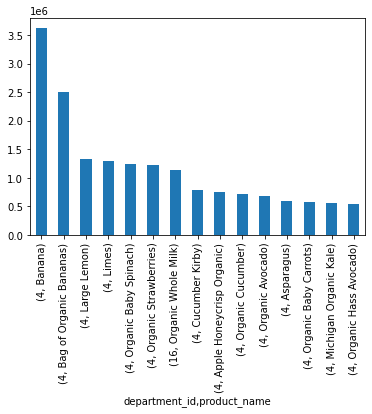

In [6]:
#graph of top products purchased
figure1 = df_filtered.groupby(['department_id','product_name'])['price'].agg('sum').sort_values(ascending=False).head(15).plot.bar()

In [7]:
#saving the image within desktop folder - added visualizations
figure1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_target_dept_product.jpg'),bbox_inches='tight')

In [9]:
#try to see regions
df_filtered.groupby(['region'])['total_spent'].agg('sum').sort_values(ascending=False)

region
South        2.300397e+10
West         1.808608e+10
Midwest      1.589468e+10
Northeast    1.257379e+10
Name: total_spent, dtype: float64

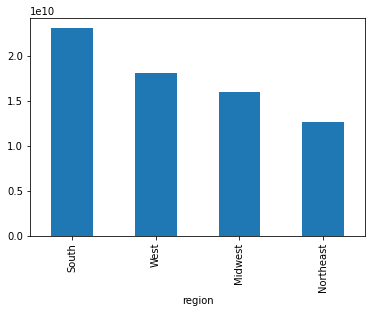

In [11]:
figure2 = df_filtered.groupby(['region'])['total_spent'].agg('sum').sort_values(ascending=False).plot.bar()

In [12]:
#saving the image within desktop folder - added visualizations
figure2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_target_region.jpg'),bbox_inches='tight')

In [18]:
#try to see total spent
df_active.groupby('value_flag').agg({'total_spent': ['sum','mean', 'min', 'max']})

total_spent                           
                         sum         mean  min      max
value_flag                                             
not target      2.970266e+10  3478.972143  6.0  23926.5
target shopper  6.955852e+10  3455.110112  6.0  25792.9

In [19]:
#try to see max_order
df_active.groupby('value_flag').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                     mean min max
value_flag                       
not target      36.243737   6  99
target shopper  35.818584   6  99

In [20]:
#try to see days since prior order
df_active.groupby('value_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
value_flag                                      
not target                  10.605270  0.0  30.0
target shopper              10.645521  0.0  30.0